# Data Frame yükleme ,değerlendirme ve boş değerleri doldurma

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("Hitters.csv")
df = df.copy()
df.head()
#veri setimizde index problemi yok 


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [2]:
df.shape


(322, 20)

In [3]:
df.isnull().sum()
# salary değişkenlerimizde boş gözlemler bulunmaktadır 
# bunları ortalama ile dolduralım 


AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [4]:
df["Salary"].fillna(df.Salary.mean() , inplace = True)
# boş maaş değerlerini ortalama ile doldurduk aslında bunları ilerde tahmin ile dolduracağız

In [5]:
df.isnull().sum().any()
# datamızda boş değer var mı ? 


False

In [6]:
df.info()
# veri setimizdeki kategorik değişkenleri düzenliyelim 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
AtBat        322 non-null int64
Hits         322 non-null int64
HmRun        322 non-null int64
Runs         322 non-null int64
RBI          322 non-null int64
Walks        322 non-null int64
Years        322 non-null int64
CAtBat       322 non-null int64
CHits        322 non-null int64
CHmRun       322 non-null int64
CRuns        322 non-null int64
CRBI         322 non-null int64
CWalks       322 non-null int64
League       322 non-null object
Division     322 non-null object
PutOuts      322 non-null int64
Assists      322 non-null int64
Errors       322 non-null int64
Salary       322 non-null float64
NewLeague    322 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 50.4+ KB


# Kategorik değişkenleri modellemeye hazır hale getirme 

In [7]:
from sklearn.preprocessing import LabelEncoder 
cat_list = ["NewLeague" , "Division" , "League"] 

lbe = LabelEncoder()
for i in cat_list:
    df[i] = lbe.fit_transform(df[i])

In [8]:
df.head(3)
# tip dönüşümlerini başarılı bir şekilde uyguladık 

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,0,0,446,33,20,535.925882,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,475.000000,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,480.000000,0


# Bagimli ve bağımsız değişken ayrışımı 

In [9]:
X = df.drop("Salary"  , axis = 1) # bagımsız degisken 

In [10]:
y = df["Salary"] #bagimli değisken 

# Veri setini Train_Test olarak ayırma

In [11]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# doğru parcalamışız

(257, 19)
(257,)
(65, 19)
(65,)


# Model Kurma

In [13]:
from sklearn.linear_model import Ridge


In [16]:
rid = Ridge(alpha = 0.01) 
# alpha(lambda) burda ceza parametresidir
rid

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [17]:
rid_model = rid.fit(X_train , y_train)

In [22]:
rid_model.coef_
# cezalandırılmış katsayılar


array([-1.85313281e+00,  5.94200474e+00,  5.43270845e+00, -1.11945690e+00,
       -3.86648484e-01,  5.10814435e+00, -9.89503949e+00, -6.69546049e-02,
       -1.99837220e-01, -1.27269524e+00,  1.34808872e+00,  7.99572902e-01,
       -5.55438492e-01, -8.73010349e+00, -9.70204327e+01,  2.80065810e-01,
        2.95024033e-01, -4.53687349e+00,  3.92500113e+01])

In [21]:
rid_model.intercept_ 
# b0

298.7726571668876


### optimum değer grafiği

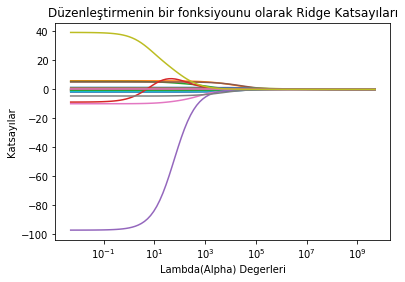

In [26]:
import matplotlib.pyplot as plt

lambdalar = 10 ** np.linspace(10 , -2 ,100) * 0.5

rid = Ridge()
katsayılar = list()

for i in lambdalar:
    rid.set_params(alpha = i )
    rid_model = rid.fit(X_train , y_train)
    katsayılar.append(rid_model.coef_)
    
ax = plt.gca()
ax.plot(lambdalar , katsayılar)
ax.set_xscale("log")#logaritmik ölceklendirme işlemi yaptık
plt.xlabel("Lambda(Alpha) Degerleri")
plt.ylabel("Katsayılar")
plt.title("Düzenleştirmenin bir fonksiyounu olarak Ridge Katsayıları");


- yukarıdaki grafikte ridge regressionun katsayılara ceza uyguayarak değiskenleri sıfıra yaklaştırdığı gözüküyor 

# Tahmin 

In [37]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error ,r2_score
rid_model = Ridge(alpha = 0.02).fit(X_train , y_train)



In [38]:
y_pred = rid_model.predict(X_test)

In [40]:
np.sqrt(mean_squared_error(y_test , y_pred))

260.52275388858794

In [41]:
r2_score(y_test , y_pred)

0.6475939301081921

# Model Tuning , Cross_val

In [47]:
from sklearn.linear_model import RidgeCV

In [49]:
lambdalar = 10 ** np.linspace(10 , -2 ,100) * 0.5
rid_cross = RidgeCV(alphas = lambdalar , 
                    scoring = "neg_mean_squared_error",
                    normalize = True ,
).fit(X_train , y_train)

# burada elimizdeki alpha parametrelerini girerek optimum alpha değerini bulmak için cross(çaprazlama) işlemi yapıyoruz

In [55]:
optimum_alp = rid_cross.alpha_
optimum_alp
# optimum alpha değerini alıyoruz

0.5748784976988678

### Şimdi final modelimizi kuralım 

In [59]:
from sklearn.linear_model import Ridge

rid_model = Ridge(alpha = optimum_alp , normalize = True ).fit(X_train , y_train)
rid_model.coef_

array([ 2.72518664e-02,  5.96923081e-01,  9.37172382e-01,  8.66525262e-01,
        7.15747146e-01,  1.48345256e+00, -3.03948815e-01,  8.38328482e-03,
        4.42766425e-02,  1.61177426e-01,  8.85228674e-02,  7.47033948e-02,
        5.58136485e-02,  1.17763027e+01, -6.77477069e+01,  1.65942406e-01,
       -9.00362391e-03, -2.36961704e+00,  2.03754809e+01])

#### final modelimiz ile tahminde bulunalım 

In [64]:
y_pred = rid_model.predict(X_test)

#### Final modelimizi değerlendirelim 

In [63]:
from sklearn.metrics import mean_squared_error, r2_score

In [65]:
np.sqrt( mean_squared_error(y_test , y_pred) )

315.7935671614045

In [66]:
r2_score(y_test ,y_pred)

0.4822040877099857